## Diabetes prediction using Machine Learning

In [3]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [4]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Value '0' in the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI does not make sense. They indicate missing values.

We have to replace these 0s with nan and then impute them with the appropriate values. 

In [9]:
diabetes_data_copy = diabetes_data.copy()

diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### To fill these NaN values the data distribution needs to be understood

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D70B4207C0>,
      dtype=object)

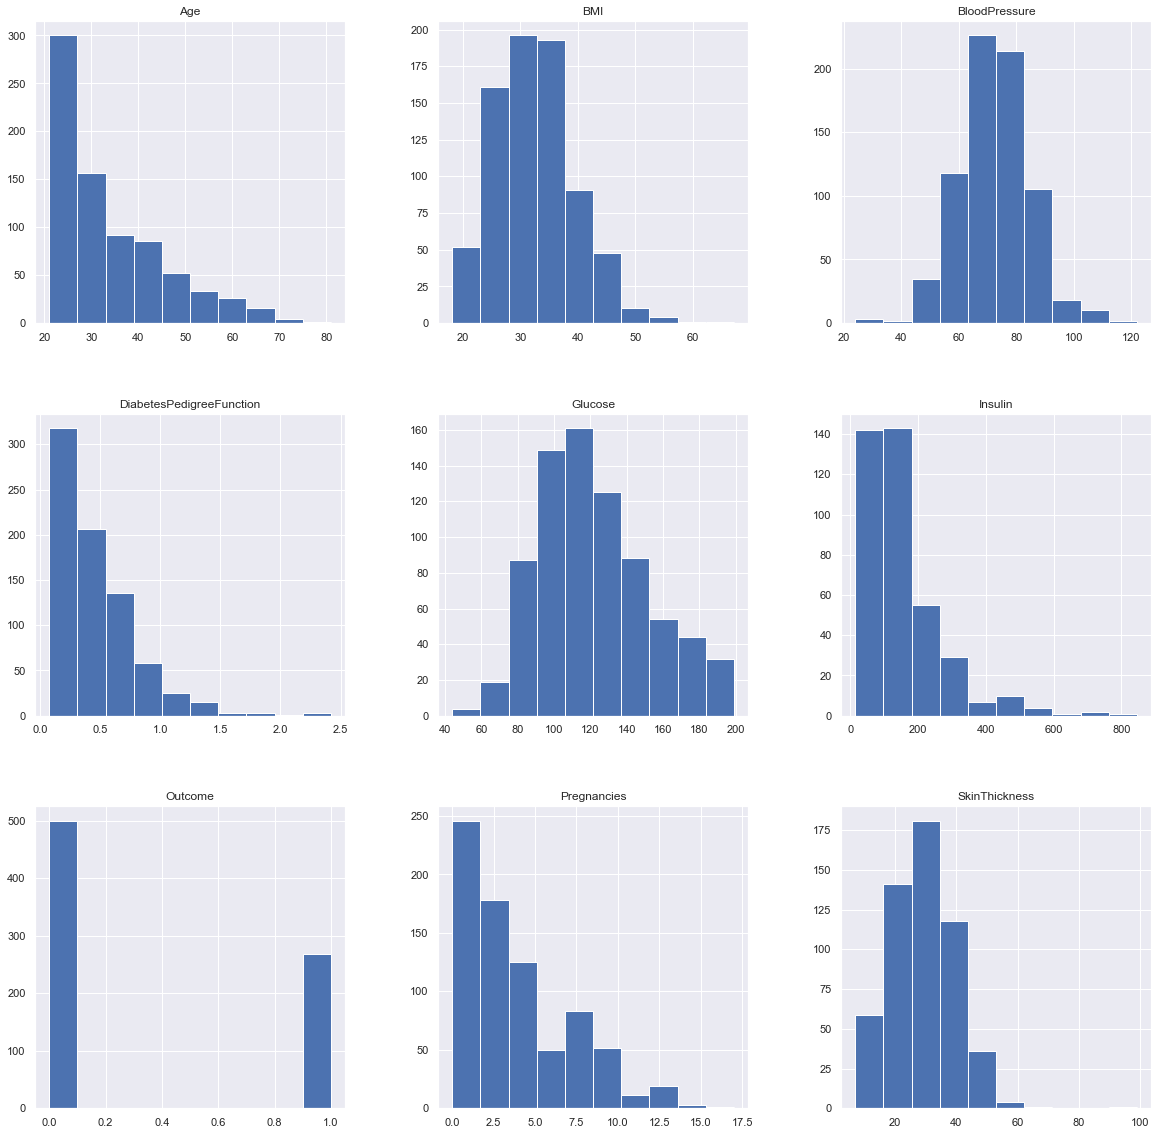

In [10]:
diabetes_data_copy.hist(figsize=(20,20))

### Imputing NaN values with median or mode

In [11]:
diabetes_data_copy.Glucose.fillna(diabetes_data_copy.Glucose.mean(),inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
diabetes_data_copy.BloodPressure.fillna(diabetes_data_copy.BloodPressure.mean(),inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
diabetes_data_copy.SkinThickness.fillna(diabetes_data_copy.SkinThickness.median(),inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
diabetes_data_copy.Insulin.fillna(diabetes_data_copy.Insulin.median(),inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [15]:
diabetes_data_copy.BMI.fillna(diabetes_data_copy.BMI.median(),inplace=True)
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Plotting after NaN removal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D70DC83040>,
      dtype=object)

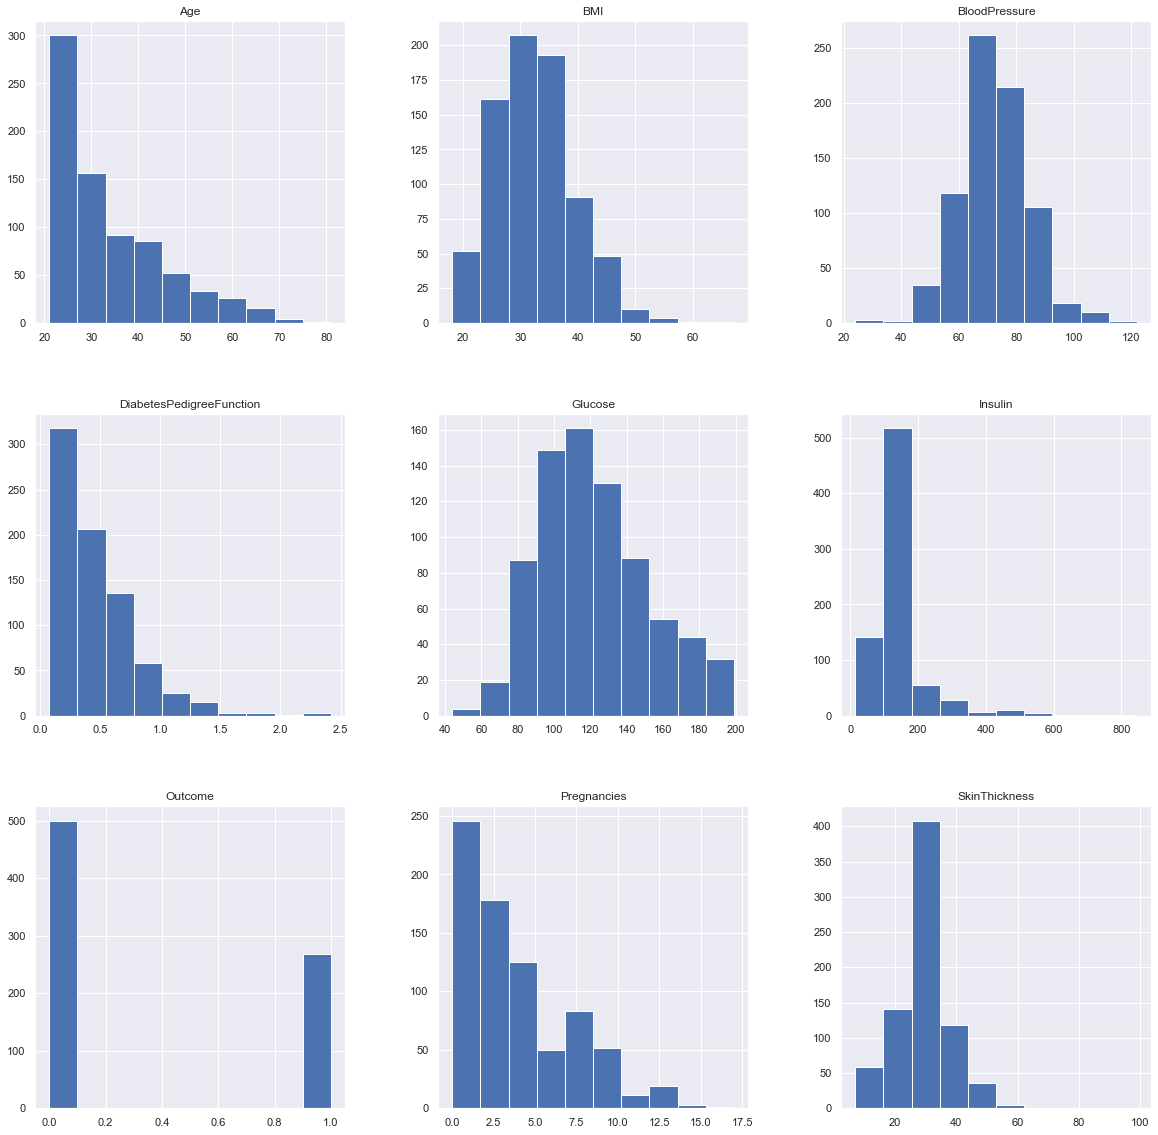

In [17]:
diabetes_data_copy.hist(figsize=(20,20))

In [18]:
# observing the shape of data
diabetes_data.shape

(768, 9)

### Scatter matrix for uncleaned data

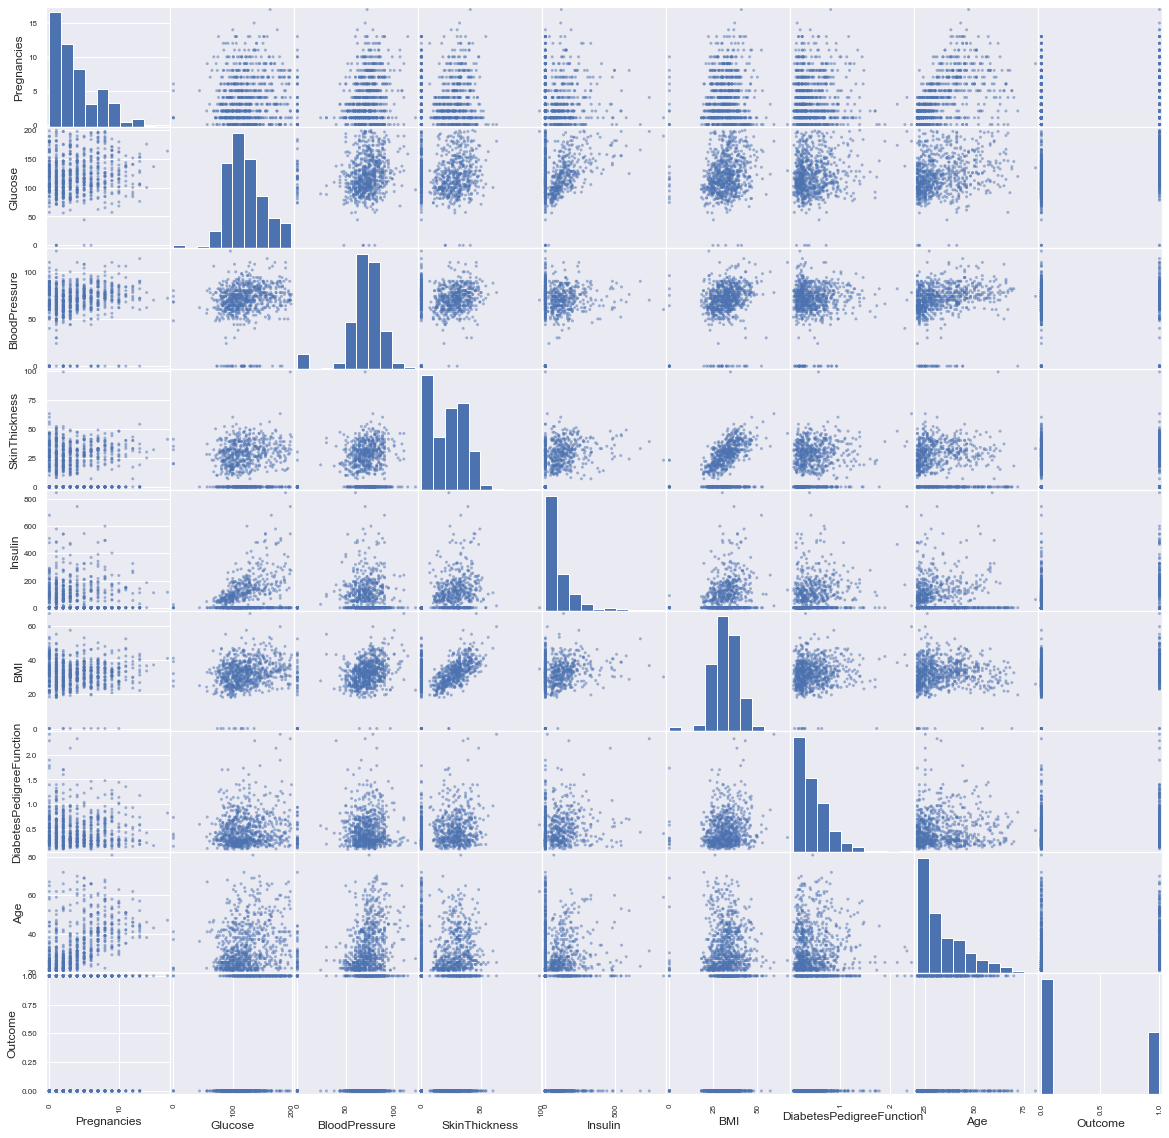

In [19]:

from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes_data,figsize=(20,20))

#### Pairplot of cleaned data

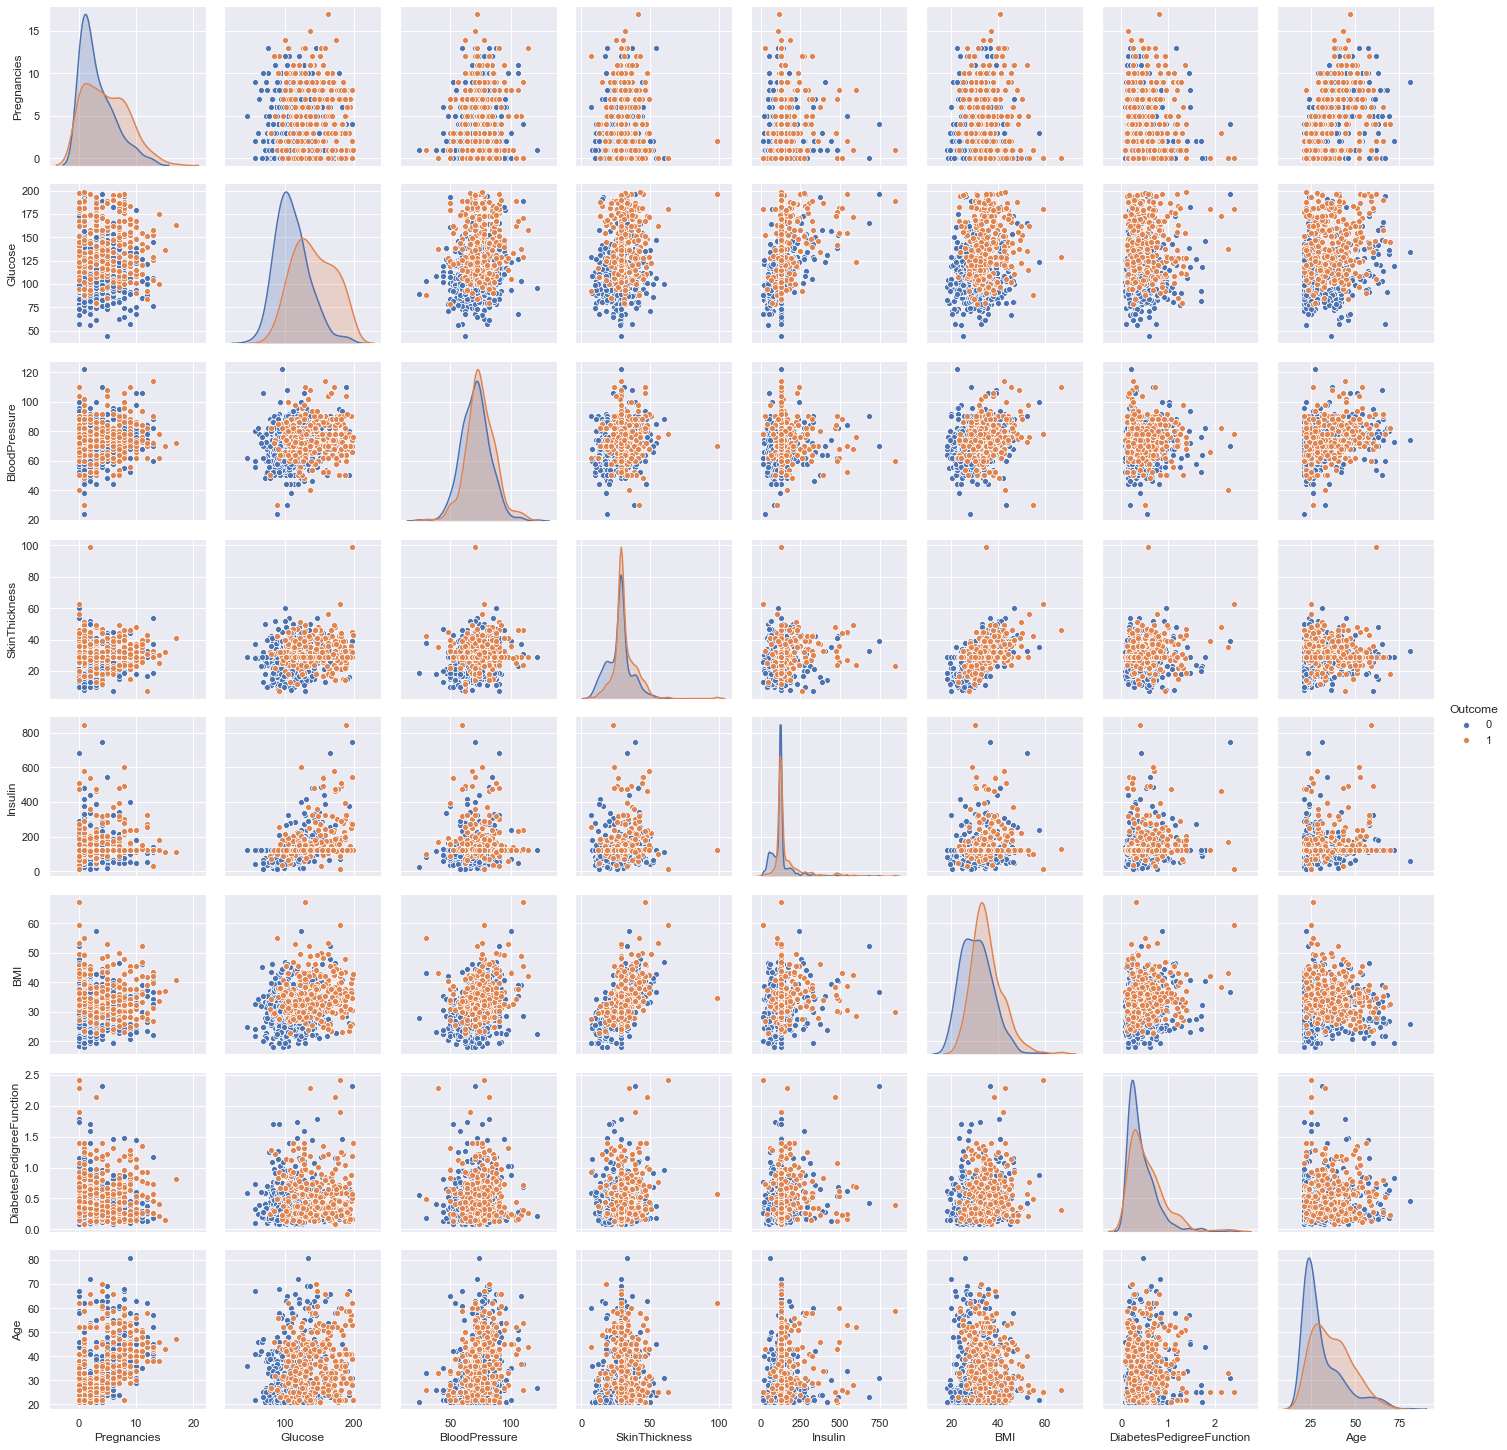

In [20]:
sns.pairplot(diabetes_data_copy,hue='Outcome')

#### Heatmap for uncleaned data

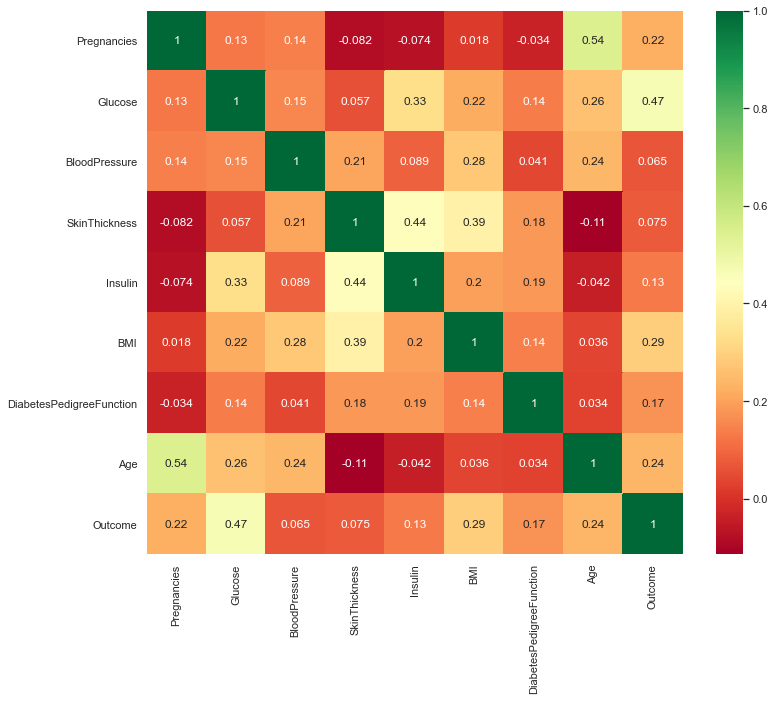

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_data.corr(),annot=True,cmap='RdYlGn')

#### Heatmap for cleaned data

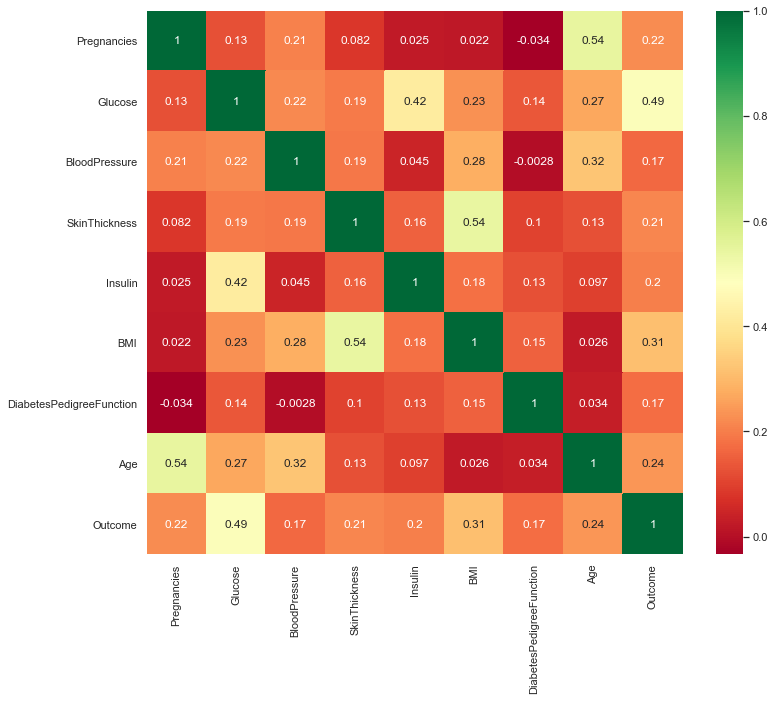

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_data_copy.corr(),annot=True,cmap='RdYlGn')

In [24]:
# diving the dataset
X = diabetes_data_copy.drop(['Outcome'],axis=1)
y = diabetes_data_copy.Outcome

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Scaling the data

In [23]:
#dataframe before transformation
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

### Train Test split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [32]:
X_train

array([[-0.84488505, -0.0554562 ,  0.62826949, ...,  0.93801102,
         2.08425547,  0.66020563],
       [ 1.23388019, -1.56781178, -0.19896517, ...,  0.41404689,
         0.70406123,  0.49003012],
       [ 0.63994726,  0.40482594, -0.19896517, ...,  0.42860145,
         0.21178189, -0.36084741],
       ...,
       [ 2.42174604, -0.97602047, -0.8607529 , ..., -0.70665417,
         1.37150746,  0.91546889],
       [-1.14185152,  1.88430422, -1.85343448, ...,  0.77791087,
        -0.05096844, -0.95646168],
       [ 0.04601433,  0.73359889, -1.19164676, ..., -0.43011755,
        -0.55834837,  0.31985461]])

In [33]:
X_test

array([[ 0.3429808 , -1.10752965, -0.52985903, ..., -1.17240006,
        -0.39224185, -0.27575966],
       [ 0.93691372, -0.25271997, -0.52985903, ...,  0.05018291,
        -0.64593181,  0.74529338],
       [ 0.93691372, -0.25271997, -0.69530596, ..., -0.73576329,
         0.78560444,  0.06459135],
       ...,
       [ 3.31264542,  0.47058053, -0.19896517, ...,  0.67602895,
        -0.96304428,  0.83038113],
       [-0.54791859, -0.68012481, -1.19164676, ..., -1.20150918,
         0.42923043, -0.87137393],
       [-0.84488505, -1.07465235,  0.29737562, ..., -0.18269004,
        -0.84525965, -0.87137393]])

In [34]:
y_train

657    0
462    0
171    1
210    0
147    0
      ..
113    0
556    0
254    1
647    1
107    0
Name: Outcome, Length: 512, dtype: int64

In [35]:
y_test

52     0
64     1
630    1
707    0
330    0
      ..
33     0
596    0
88     1
679    0
112    0
Name: Outcome, Length: 256, dtype: int64

Now, the train and test data are ready to fed to a machine learning model